In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the
classification algorithms discussed in the session)

In [ ]:
# Reading data
data = pd.read_excel('/content/iris (2).xls')

In [ ]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# checking Null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

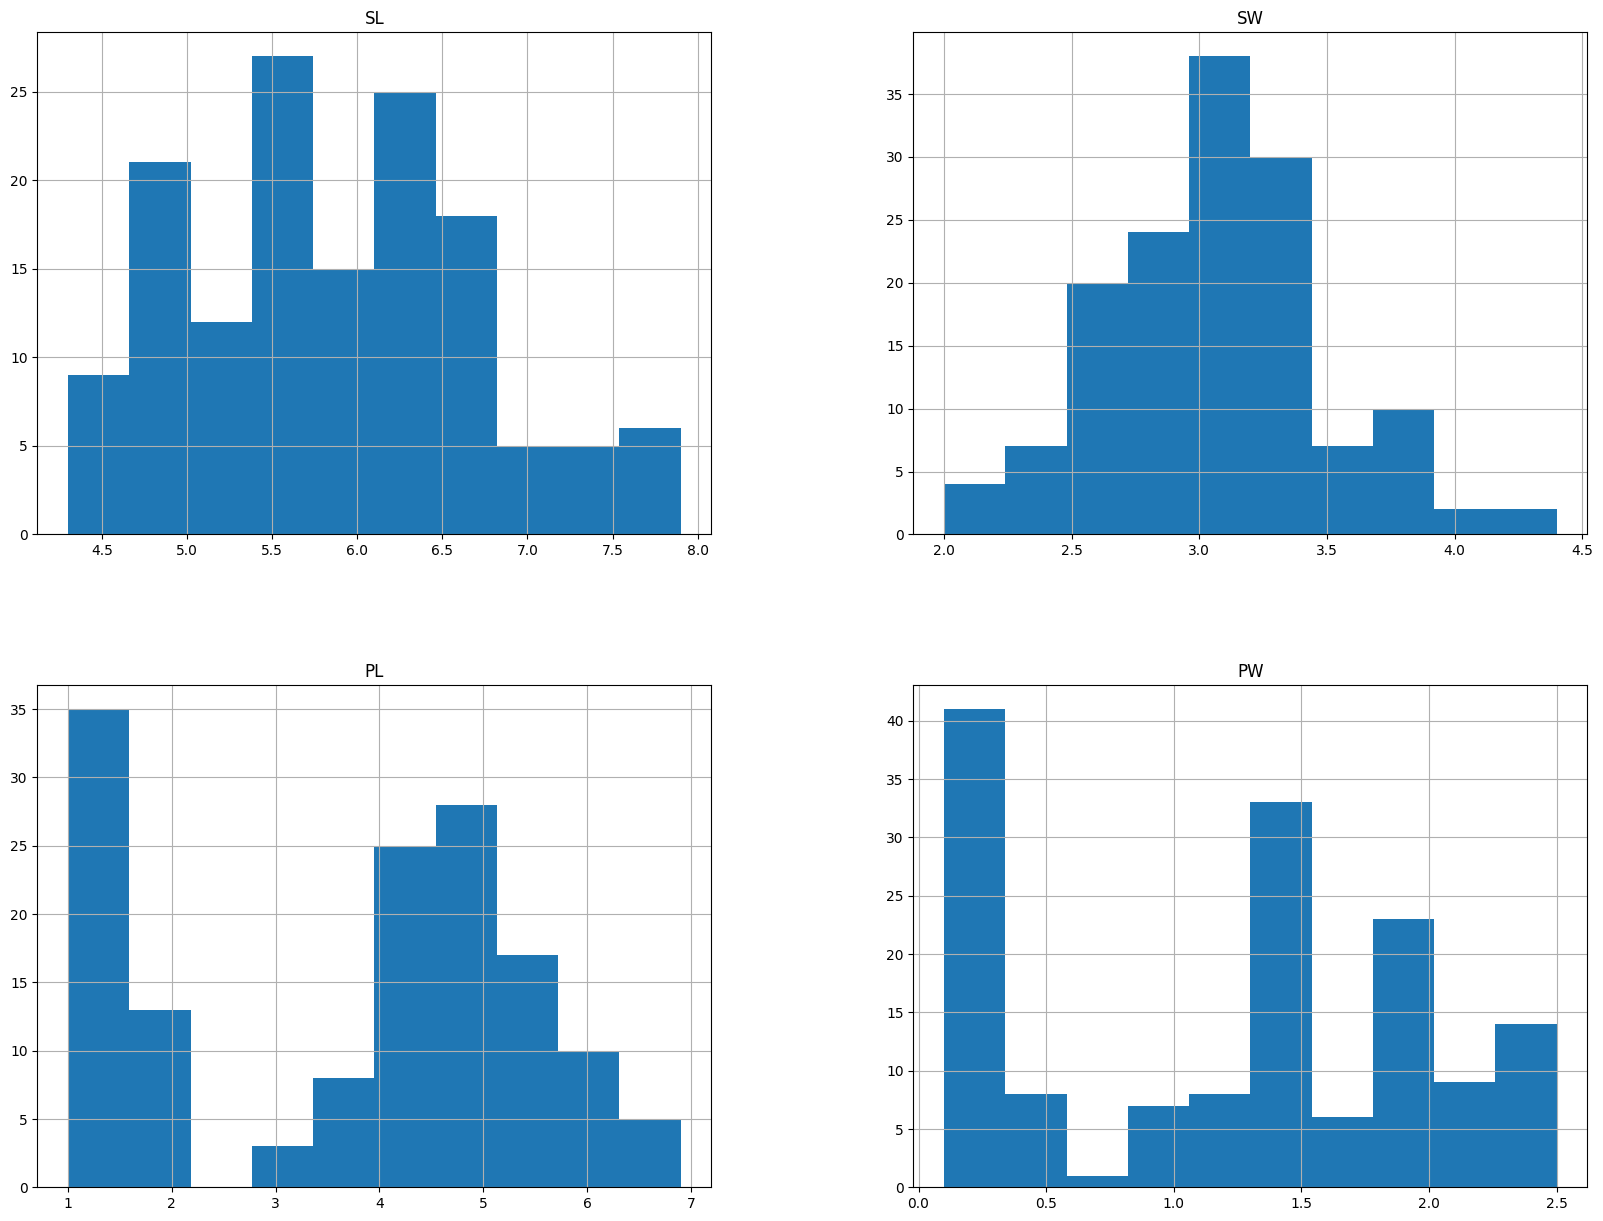

In [ ]:
# checking Skewness of Numerical values
freqgraph=data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))

In [ ]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# printing colunmns
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [ ]:
# Filling median to columns which are having Null values
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [ ]:
# checking Null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

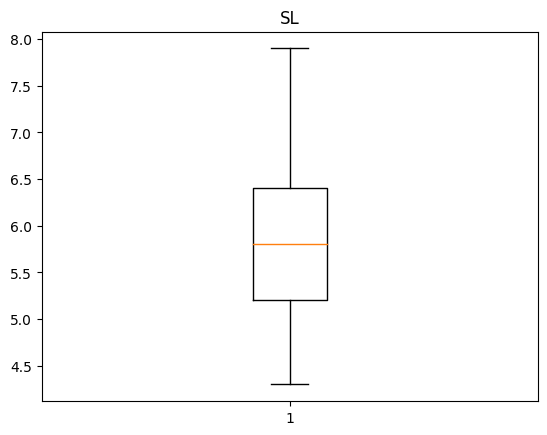

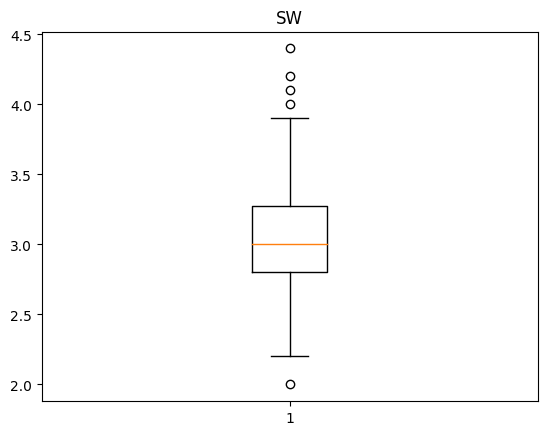

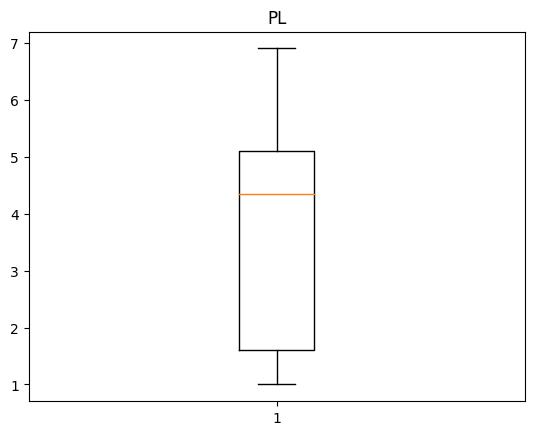

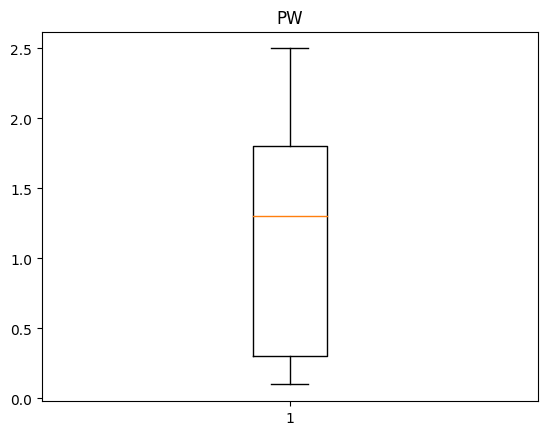

In [ ]:
# Box plot of Numerical data to checking Outliers
num_columns=['SL', 'SW', 'PL', 'PW']

for i in num_columns:
   plt.figure()
   plt.boxplot(data[i])
   plt.title(i);

In [ ]:
# Controlling outliers
Q1=np.percentile(data['SW'],25,method='midpoint')
Q2=np.percentile(data['SW'],50,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

Q1 is  2.8
Q2 is  3.0
Q3 is  3.25


In [ ]:
IQR = Q3-Q1
print(IQR)

0.4500000000000002


In [ ]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR

print('Lower Whisker',low_lim)

print('Upper Whisker',up_lim)

Lower Whisker 2.1249999999999996
Upper Whisker 3.9250000000000003


In [ ]:
outlier =[]
for x in data['SW']:
  if ((x<low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [ ]:
data['SW'] = data['SW'].clip(lower=low_lim,upper=up_lim)

In [ ]:
# checking outliers
outlier =[]
for x in data['SW']:
  if ((x<low_lim) or (x>up_lim)):
    outlier.append(x)

print(outlier)

[]


In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [ ]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


<Axes: >

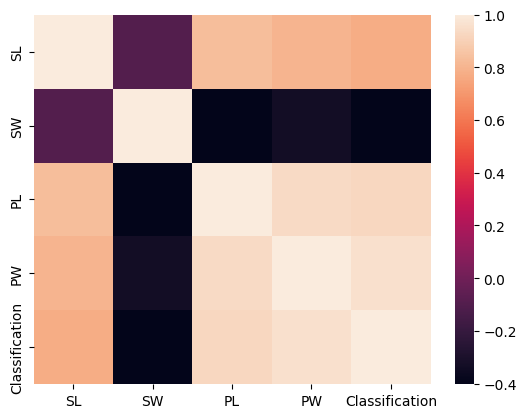

In [ ]:
# plotting Correlation heatmap
sns.heatmap(data.corr())

In [ ]:
data.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.100056,0.830554,0.800939,0.774077
SW,-0.100056,1.000000,-0.402621,-0.335121,-0.402577
PL,0.830554,-0.402621,1.000000,0.936089,0.927509
PW,0.800939,-0.335121,0.936089,1.000000,0.956464
Classification,0.774077,-0.402577,0.927509,0.956464,1.000000


In [ ]:
# assigning dependent and independent variables
X=data.drop('Classification',axis=1)
y=data['Classification']

In [ ]:
# target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int64

In [ ]:
# prediction
X

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [ ]:
# checking logistic regression classification
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [ ]:
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_log_pred=log_reg.predict(X_test)

In [ ]:
y_log_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
confusion_matrix(y_test,y_log_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print("Precision Score : ",precision_score(y_test, y_log_pred,
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test,y_log_pred,
                                           pos_label='positive',
                                           average='micro'))
print("F1 : ",f1_score(y_test,y_log_pred,
                                           pos_label='positive',
                                           average='micro'))

Accuracy : 1.0
Precision Score :  1.0
Recall Score :  1.0
F1 :  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# doing Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
log_reg.fit(X_train,y_train)
y_log_pred=log_reg.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_log_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print("Precision Score : ",precision_score(y_test, y_log_pred,
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test,y_log_pred,
                                           pos_label='positive',
                                           average='micro'))
print("F1 : ",f1_score(y_test,y_log_pred,
                                           pos_label='positive',
                                           average='micro'))

Accuracy : 0.9666666666666667
Precision Score :  0.9666666666666667
Recall Score :  0.9666666666666667
F1 :  0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [ ]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred_knn=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

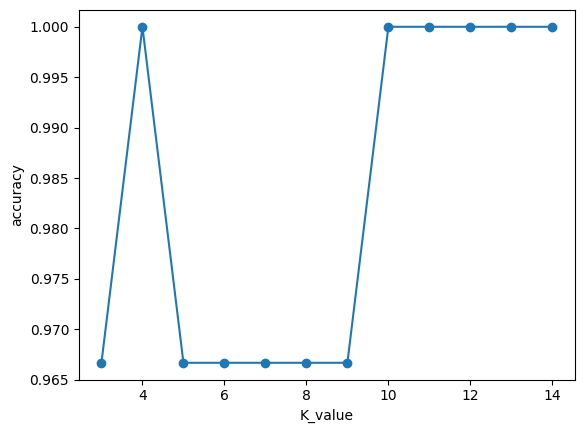

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print("Precision Score : ",precision_score(y_test, y_log_pred,
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test,y_log_pred,
                                           pos_label='positive',
                                           average='micro'))
print("F1 : ",f1_score(y_test,y_log_pred,
                                           pos_label='positive',
                                           average='micro'))

Accuracy : 0.9666666666666667
Precision Score :  0.9666666666666667
Recall Score :  0.9666666666666667
F1 :  0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


SVM Model

In [ ]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred = sv_cl.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy is :', accuracy_score(y_test,y_pred))

Accuracy is : 0.9333333333333333


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

In [ ]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 1.0


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [ ]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.9666666666666667


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


Hyper Parameter Tuning

In [ ]:
rf_clf1=RandomForestClassifier(n_estimators=20, max_depth=20, criterion='entropy',min_samples_split=3)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [ ]:
y_pred = rf_clf1.predict(X_test)

In [ ]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.9666666666666667


Decision tree is considered as best model classifier which giving accuracy value of 1.